# Problem 3 - Perceptron

## 3.1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

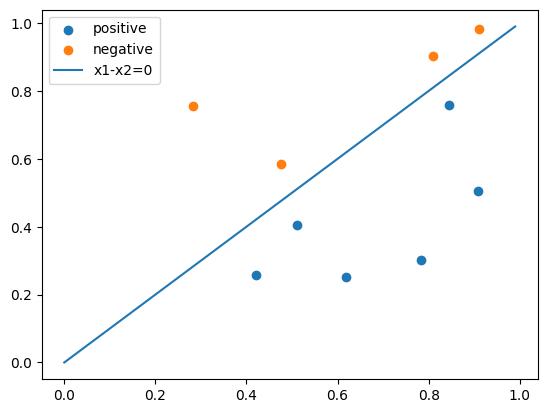

In [ ]:
# Visualization
random.seed(0)
x1_pos = []
x2_pos = []
x1_neg = []
x2_neg = []
train_data = []
# Generate 10 training points
for i in range(10):
    x1, x2 = random.random(), random.random()
    train_data.append(np.array([1, x1, x2]))  # Added bias term (constant 1) to each data point

    if x1 > x2:
        x1_pos.append(x1)
        x2_pos.append(x2)
    else:
        x1_neg.append(x1)
        x2_neg.append(x2)
x1_range = np.arange(0, 1, 0.01)
plt.scatter(x1_pos, x2_pos, label='positive')
plt.scatter(x1_neg, x2_neg, label='negative')
plt.plot(x1_range, x1_range, label='x1-x2=0')
plt.legend()
plt.show()

In [ ]:
# Data Generation
def generate_data(num_points):
    X = np.random.rand(num_points, 2)
    y = np.where(X[:, 0] > X[:, 1], 1, -1)
    return X, y

X_train, y_train = generate_data(10)
X_test, y_test = generate_data(5000)

# Perceptron Algorithm with Perceptron Criterion
def perceptron(X, y, epochs=1000, lr=0.01, loss="perceptron"):
    w = np.zeros(2)
    for _ in range(epochs):
        for i in range(len(X)):
            if loss == "perceptron":
                update = lr * np.where(np.dot(w, X[i]) * y[i] <= 0, y[i], 0)
            elif loss == "hinge":
                update = lr * np.where(1 - np.dot(w, X[i]) * y[i] > 0, y[i], 0)
            w += update * X[i]
    return w

In [ ]:
# Training with Perceptron Criterion
w_perceptron = perceptron(X_train, y_train, loss="perceptron")
y_pred_perceptron = np.sign(X_test @ w_perceptron)
accuracy_perceptron = np.mean(y_pred_perceptron == y_test)
print(f"Accuracy on test data (perceptron): {accuracy_perceptron*100:.2f}%")

Accuracy on test data (perceptron): 91.40%


## 3.2

In [ ]:
# Training with Hinge Loss
w_hinge = perceptron(X_train, y_train, loss="hinge")
y_pred_hinge = np.sign(X_test @ w_hinge)
accuracy_hinge = np.mean(y_pred_hinge == y_test)
print(f"Accuracy on test data (hinge): {accuracy_hinge*100:.2f}%")

Accuracy on test data (perceptron): 97.30%


## 3.3

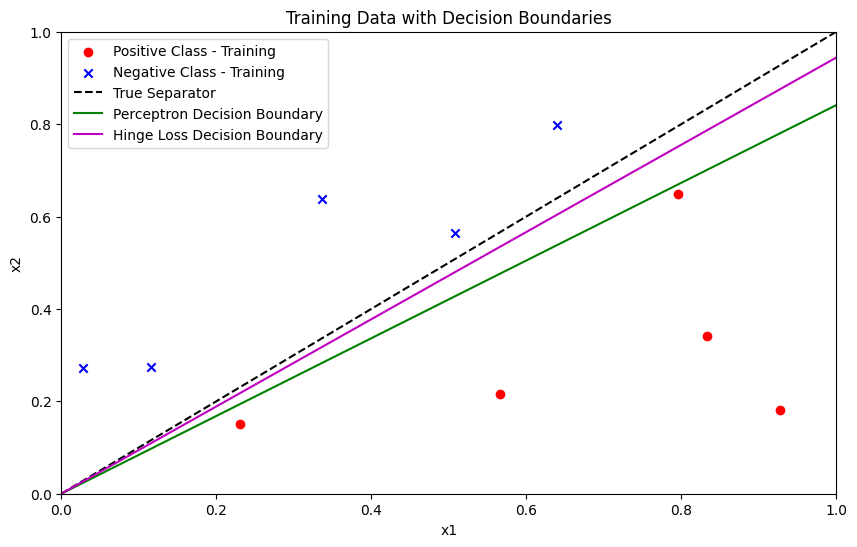

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))

# Plotting the training points
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Positive Class - Training', marker='o')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], c='blue', label='Negative Class - Training', marker='x')

# True Separator
plt.plot([0, 1], [0, 1], 'k--', label='True Separator')

# Decision Boundaries
x_vals = np.linspace(0, 1, 100)
y_vals_perceptron = (-w_perceptron[0] * x_vals) / w_perceptron[1]
y_vals_hinge = (-w_hinge[0] * x_vals) / w_hinge[1]
plt.plot(x_vals, y_vals_perceptron, 'g-', label='Perceptron Decision Boundary')
plt.plot(x_vals, y_vals_hinge, 'm-', label='Hinge Loss Decision Boundary')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data with Decision Boundaries')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

**Answer:**

From the provided results, the perceptron trained with hinge-loss achieves a better test accuracy of 97.30% compared to the perceptron criterion's 91.40%.

Why? Well, hinge-loss aims to maximize the margin between classes, which can help improve generalization on test data. By striving to not only classify training points correctly but also ensuring they are classified with a certain margin, the model can potentially become more robust to slight variations in the input. This is particularly evident in my results, where the hinge-loss trained perceptron has a decision boundary that seems closer to the true separator and results in higher test accuracy.

## 3.4

**Answer:**

Given my results, the classifier trained with hinge-loss seems to be more robust and consistent, as evidenced by its higher test accuracy. Hence, even with a different set of 10 training points, the hinge-loss trained classifier is more likely to maintain a consistent performance on the 5000 test instances. This is because, by maximizing the margin, hinge-loss tends to reduce the model's sensitivity to individual training examples, making it potentially more stable to variations in the training set.